In [7]:
import os
import glob
import pandas as pd
import xml.etree.ElementTree as ET
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# XML 파일을 CSV로 변환하는 함수
def xml_to_csv(xml_folder_path):
    xml_list = []
    for xml_file in glob.glob(os.path.join(xml_folder_path, '*.xml')):
        tree = ET.parse(xml_file)
        root = tree.getroot()
        for member in root.findall('object'):
            value = (
                root.find('filename').text,
                int(root.find('size/width').text),
                int(root.find('size/height').text),
                member.find('name').text,
                int(member.find('bndbox/xmin').text),
                int(member.find('bndbox/ymin').text),
                int(member.find('bndbox/xmax').text),
                int(member.find('bndbox/ymax').text)
            )
            xml_list.append(value)
    
    column_name = ['filename', 'width', 'height', 'class', 'xmin', 'ymin', 'xmax', 'ymax']
    xml_df = pd.DataFrame(xml_list, columns=column_name)
    return xml_df

# XML 파일이 저장된 폴더 경로
xml_folder_path = '/Users/chaewon/Desktop/snukdt/시각화웹개발/project/labeled_img'

# XML 데이터를 CSV로 변환
df = xml_to_csv(xml_folder_path)

# CSV 파일로 저장
csv_output_path = '/Users/chaewon/Desktop/snukdt/시각화웹개발/project/labeled_img/labels.csv'
df.to_csv(csv_output_path, index=False)

csv_output_path


'/Users/chaewon/Desktop/snukdt/시각화웹개발/project/labeled_img/labels.csv'

In [8]:
df.head()

,filename,width,height,class,xmin,ymin,xmax,ymax
0,IMG_2549.jpg,1179,862,이한상,336,174,377,274
1,IMG_2549.jpg,1179,862,이지환,448,145,542,239
2,IMG_2549.jpg,1179,862,배종성,653,263,736,345
3,IMG_2549.jpg,1179,862,양지수,153,215,224,333
4,IMG_2549.jpg,1179,862,임종욱,18,239,136,404


In [9]:
# 이미지별로 timestamp 지정
df.loc[df['filename'] == 'IMG_2547.jpg', 'timestamp'] = '2024-08-12 21:00:00'
df.loc[df['filename'] == 'IMG_2548.jpg', 'timestamp'] = '2024-08-12 21:30:00'
df.loc[df['filename'] == 'IMG_2549.jpg', 'timestamp'] = '2024-08-13 03:00:00'
df.loc[df['filename'] == 'IMG_2550.JPG', 'timestamp'] = '2024-08-13 12:00:00'
df.loc[df['filename'] == 'IMG_2551.JPG', 'timestamp'] = '2024-08-13 04:00:00'
df.loc[df['filename'] == 'IMG_2552.JPG', 'timestamp'] = '2024-08-13 04:30:00'

# 시간 정보를 datetime 형식으로 변환
df['timestamp'] = pd.to_datetime(df['timestamp'])

df.head()

/var/folders/h5/mq1l1zwx7c9gymlzc90v0pnm0000gn/T/ipykernel_6666/2483027873.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '2024-08-12 21:00:00' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[df['filename'] == 'IMG_2547.jpg', 'timestamp'] = '2024-08-12 21:00:00'


,filename,width,height,class,xmin,ymin,xmax,ymax,timestamp
0,IMG_2549.jpg,1179,862,이한상,336,174,377,274,2024-08-13 03:00:00
1,IMG_2549.jpg,1179,862,이지환,448,145,542,239,2024-08-13 03:00:00
2,IMG_2549.jpg,1179,862,배종성,653,263,736,345,2024-08-13 03:00:00
3,IMG_2549.jpg,1179,862,양지수,153,215,224,333,2024-08-13 03:00:00
4,IMG_2549.jpg,1179,862,임종욱,18,239,136,404,2024-08-13 03:00:00


In [10]:
# 시간 순으로 정렬
df = df.sort_values(by='timestamp')

In [11]:
#시간까지 포함한 데이터프레임 -> csv로 내보내기
csv_output_path = '/Users/chaewon/Desktop/snukdt/시각화웹개발/project/labeled_data.csv'
df.to_csv(csv_output_path, index=False)

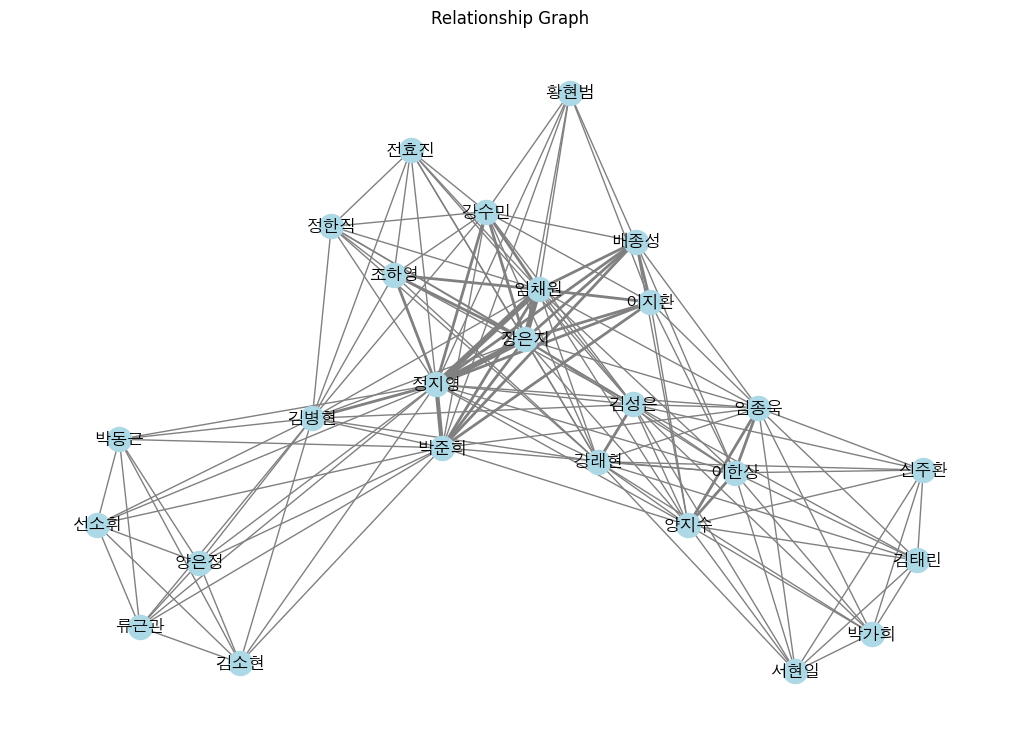

In [12]:
# 관계 그래프 생성
G = nx.Graph()

# 각 이미지에서 등장한 인물 간의 관계 추가
for filename, group in df.groupby('filename'):
    persons = list(group['class'])  # 'class' 컬럼을 사용하여 인물 이름 리스트 생성
    for i in range(len(persons)):
        for j in range(i + 1, len(persons)):
            if G.has_edge(persons[i], persons[j]):
                G[persons[i]][persons[j]]['weight'] += 1
            else:
                G.add_edge(persons[i], persons[j], weight=1)

# 그래프 시각화
pos = nx.spring_layout(G)
weights = [G[u][v]['weight'] for u, v in G.edges()]

plt.figure(figsize=(10, 7))
nx.draw(G, pos, with_labels=True, font_family='AppleGothic', width=weights, node_color='lightblue', edge_color='gray')
plt.title('Relationship Graph')
plt.show()
